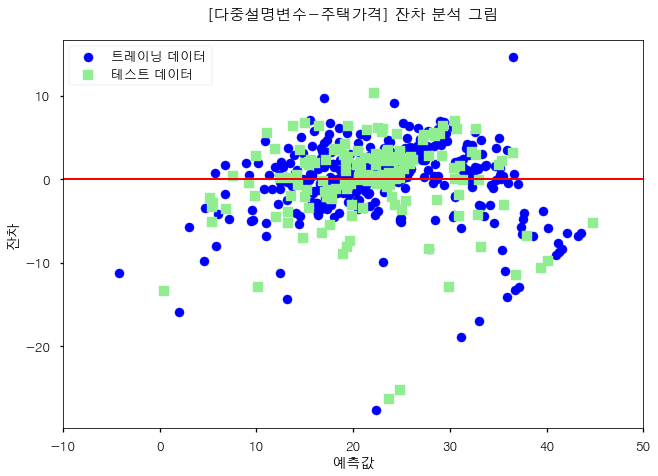

In [5]:
# 보스턴 외곽 지역 주택정보 14개 범주에서 처음 13개는 설명변수로 하고
# 주택 가격 MEDV는 반응 값으로 하여 잔차를 분석하는 코드

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import train_test_split

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 주택 정보에서 마지막 열(MEDV)를 제외한 열의 값들을 X로 둠
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression()
# lr = Ridge(alpha=1.0)
# lr = Lasso(alpha=1.0)
# lr = ElasticNet(alpha=1.0, l1_ratio=0.5)
# ElasticNet()인자 l1_ratio는 람다2의 비율을 뜻함
# 이 값을 1.0으로 설정하면 LASSO와 동일한 효과를 갖는다.

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='트레이닝 데이터')
plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='테스트 데이터')

plt.xlabel('예측값')
plt.ylabel('잔차')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.title('[다중설명변수-주택가격] 잔차 분석 그림\n')
plt.legend(loc=2)
plt.show()



In [6]:
# 결정 계수 R2
# R2 = 1 - MSE/분산
# 평균 제곱 오차(Mean Square Error; MSE)


# LinearRegression 적용
# MSE - 트레이닝 데이터: 19.96, 테스트 데이터: 27.20
# R2 - 트레이닝 데이터: 0.76, 테스트 데이터: 0.67
        
# Ridge 적용
# MSE - 트레이닝 데이터: 20.14, 테스트 데이터: 27.76
# R2 - 트레이닝 데이터: 0.76, 테스트 데이터: 0.67

# LASSO 적용
# MSE - 트레이닝 데이터: 24.72, 테스트 데이터: 32.35
# R2 - 트레이닝 데이터: 0.71, 테스트 데이터: 0.61

# Elastic Net 적용
# MSE - 트레이닝 데이터: 24.38, 테스트 데이터: 31.87
# R2 - 트레이닝 데이터: 0.71, 테스트 데이터: 0.62

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('MSE - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(mse_train, mse_test))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2 - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(r2_train, r2_test))

MSE - 트레이닝 데이터: 19.96, 테스트 데이터: 27.20
R2 - 트레이닝 데이터: 0.76, 테스트 데이터: 0.67
